<a href="https://colab.research.google.com/github/vishwasjoshi2019/Renko_Charts_Strategy/blob/main/Correlation_matrix(American_Stocks_%2C_Commodity%2C_index).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf  # You can use the yfinance library to fetch historical stock data

In [4]:
# Import necessary libraries
import pandas as pd
import yfinance as yf

# Define the list of asset tickers, including UUP for the U.S. Dollar Index ETF
assets = ['AAPL', 'MSFT', 'KO', 'BRK-B', 'WM', 'CSX', 'UNH', 'BAC', 'QQQ', 'SPY', 'ZW=F', 'SI=F', 'GC=F', 'CL=F', 'HG=F', '^NDX', '^DJI', '^GSPC', '^VIX', 'UUP']

# Update asset_names dictionary with UUP
asset_names = {
    'AAPL': 'Apple Inc.',
    'MSFT': 'Microsoft Corporation',
    'KO': 'The Coca-Cola Company',
    'BRK-B': 'Berkshire Hathaway Inc.',
    'WM': 'Waste Management, Inc.',
    'CSX': 'CSX Corporation',
    'UNH': 'UnitedHealth Group Incorporated',
    'BAC': 'Bank of America Corporation',
    'QQQ': 'Invesco QQQ Trust',
    'SPY': 'SPDR S&P 500 ETF Trust',
    'ZW=F': 'Wheat Futures',
    'SI=F': 'Silver Futures',
    'GC=F': 'Gold Futures',
    'CL=F': 'Crude Oil Futures',
    'HG=F': 'Copper Futures',
    '^NDX': 'Nasdaq-100 Index',
    '^DJI': 'Dow Jones Industrial Average',
    '^GSPC': 'S&P 500 Index',
    '^VIX': 'CBOE Volatility Index',
    'UUP': 'U.S. Dollar Index ETF (UUP)'
}

# Define the date range
start_date = '2023-01-01'
end_date = '2023-09-24'

# Create an empty DataFrame to store the adjusted closing prices
df = pd.DataFrame()

# Fetch historical data for each asset and populate the DataFrame
for asset in assets:
    data = yf.download(asset, start=start_date, end=end_date)
    df[asset] = data['Adj Close']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [5]:

# Calculate daily returns
daily_returns = df.pct_change().dropna()

# Calculate the correlation matrix
correlation_matrix = daily_returns.corr().round(3)

# Print the correlation matrix
print(correlation_matrix)


        AAPL   MSFT     KO  BRK-B     WM    CSX    UNH    BAC    QQQ    SPY  \
AAPL   1.000  0.534  0.258  0.420  0.201  0.375  0.054  0.247  0.763  0.737   
MSFT   0.534  1.000  0.119  0.207  0.093  0.239  0.064  0.125  0.784  0.640   
KO     0.258  0.119  1.000  0.417  0.469  0.310  0.297  0.217  0.209  0.383   
BRK-B  0.420  0.207  0.417  1.000  0.291  0.484  0.187  0.600  0.462  0.693   
WM     0.201  0.093  0.469  0.291  1.000  0.232  0.315  0.054  0.121  0.273   
CSX    0.375  0.239  0.310  0.484  0.232  1.000  0.070  0.396  0.434  0.565   
UNH    0.054  0.064  0.297  0.187  0.315  0.070  1.000  0.103  0.021  0.167   
BAC    0.247  0.125  0.217  0.600  0.054  0.396  0.103  1.000  0.374  0.585   
QQQ    0.763  0.784  0.209  0.462  0.121  0.434  0.021  0.374  1.000  0.914   
SPY    0.737  0.640  0.383  0.693  0.273  0.565  0.167  0.585  0.914  1.000   
ZW=F  -0.042  0.105  0.219  0.013  0.114  0.108  0.202  0.145  0.007  0.059   
SI=F   0.127  0.172  0.146 -0.020  0.092  0.048  0.0

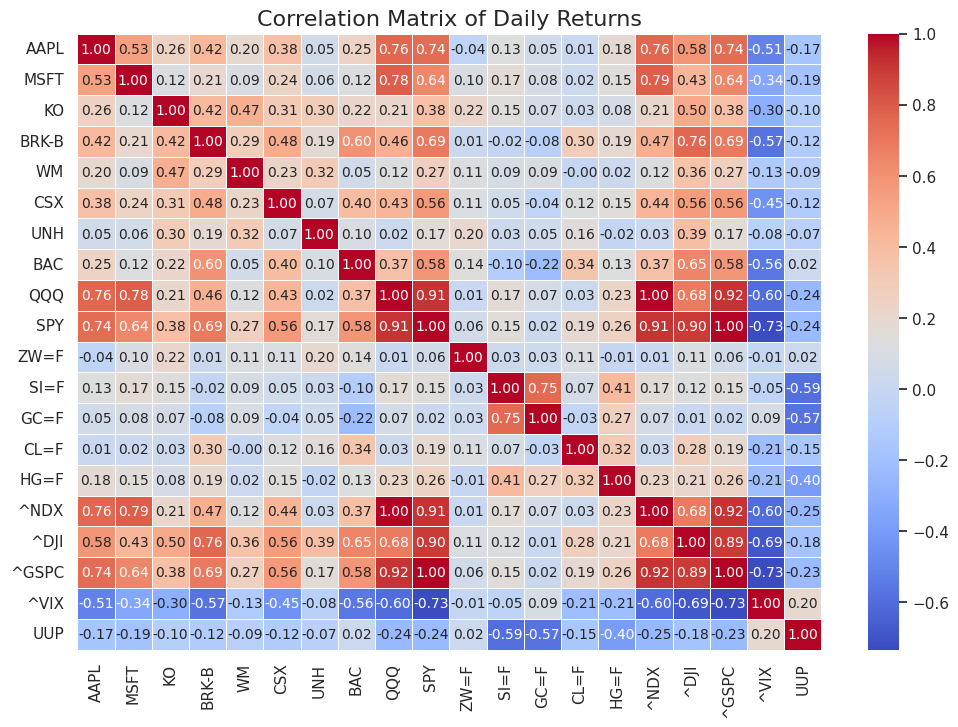

In [6]:

# Set up the heatmap
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.0)  # Adjust font size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 10})

# Add a title
plt.title('Correlation Matrix of Daily Returns', fontsize=16)

# Show the plot
plt.show()

In [ ]:
# Define thresholds for correlations
high_corr_threshold = 0.8
low_corr_threshold = 0.2
negative_corr_threshold = -0.2

# Create dictionaries to store filtered correlations
high_corr_stocks = {}
low_corr_stocks = {}
negative_corr_stocks = {}
correlated_stock_indices = {}
stock_vs_index_corr = {}
commodity_vs_index_corr = {}
stock_indices_corr = {}

# Loop through the assets and their names
for asset_ticker in assets:
    for asset_ticker_2 in assets:
        # Skip self-correlations
        if asset_ticker == asset_ticker_2:
            continue

        corr_value = correlation_matrix[asset_ticker][asset_ticker_2]

        # Check if the correlation is higher than the high threshold
        if corr_value >= high_corr_threshold:
            # Check if both assets are stocks
            if asset_ticker in asset_names and asset_ticker_2 in asset_names:
                # Store highly correlated stock pairs
                if asset_ticker not in high_corr_stocks:
                    high_corr_stocks[asset_ticker] = []
                high_corr_stocks[asset_ticker].append((asset_ticker_2, corr_value))

            # Check if both assets are stock indices
            elif asset_ticker.startswith('^') and asset_ticker_2.startswith('^'):
                # Store highly correlated stock indices pairs
                if asset_ticker not in correlated_stock_indices:
                    correlated_stock_indices[asset_ticker] = []
                correlated_stock_indices[asset_ticker].append((asset_ticker_2, corr_value))

            # Check if one asset is a stock and the other is a stock index
            elif asset_ticker in asset_names and asset_ticker_2.startswith('^'):
                # Store correlation between stock and stock index
                stock_vs_index_corr[(asset_ticker, asset_ticker_2)] = corr_value

            # Check if one asset is a commodity future and the other is an index
            elif asset_ticker.startswith(('ZW=F', 'SI=F', 'GC=F', 'CL=F', 'HG=F')) and asset_ticker_2.startswith('^'):
                # Store correlation between commodity futures and index
                commodity_vs_index_corr[(asset_ticker, asset_ticker_2)] = corr_value

        # Check if the correlation is lower than the low threshold
        elif corr_value <= low_corr_threshold:
            # Check if both assets are stocks
            if asset_ticker in asset_names and asset_ticker_2 in asset_names:
                # Store low correlated stock pairs
                if asset_ticker not in low_corr_stocks:
                    low_corr_stocks[asset_ticker] = []
                low_corr_stocks[asset_ticker].append((asset_ticker_2, corr_value))

        # Check if the correlation is less than the negative threshold
        elif corr_value <= negative_corr_threshold:
            # Check if both assets are stocks
            if asset_ticker in asset_names and asset_ticker_2 in asset_names:
                # Store negatively correlated stock pairs
                if asset_ticker not in negative_corr_stocks:
                    negative_corr_stocks[asset_ticker] = []
                negative_corr_stocks[asset_ticker].append((asset_ticker_2, corr_value))

# Print the results
print("Highly Correlated Stocks:")
for stock, correlated in high_corr_stocks.items():
    print(f"{asset_names[stock]}:")
    for correlated_stock, corr_value in correlated:
        print(f"- {asset_names[correlated_stock]} (Correlation: {corr_value})")

print("\nLow Correlated Stocks:")
for stock, correlated in low_corr_stocks.items():
    print(f"{asset_names[stock]}:")
    for correlated_stock, corr_value in correlated:
        print(f"- {asset_names[correlated_stock]} (Correlation: {corr_value})")

print("\nNegatively Correlated Stocks:")
for stock, correlated in negative_corr_stocks.items():
    print(f"{asset_names[stock]}:")
    for correlated_stock, corr_value in correlated:
        print(f"- {asset_names[correlated_stock]} (Correlation: {corr_value})")

print("\nCorrelated Stock Indices:")
for stock_index, correlated in correlated_stock_indices.items():
    print(f"{asset_names[stock_index]}:")
    for correlated_index, corr_value in correlated:
        print(f"- {asset_names[correlated_index]} (Correlation: {corr_value})")

print("\nStock vs. Stock Index Correlations:")
for (stock, stock_index), corr_value in stock_vs_index_corr.items():
    print(f"{asset_names[stock]} vs. {asset_names[stock_index]} (Correlation: {corr_value})")

print("\nCommodity vs. Index Correlations:")
for (commodity, index), corr_value in commodity_vs_index_corr.items():
    print(f"{asset_names[commodity]} vs. {asset_names[index]} (Correlation: {corr_value})")


Highly Correlated Stocks:
Apple Inc.:
- Invesco QQQ Trust (Correlation: 0.846)
- SPDR S&P 500 ETF Trust (Correlation: 0.814)
- Nasdaq-100 Index (Correlation: 0.846)
- S&P 500 Index (Correlation: 0.816)
Microsoft Corporation:
- Invesco QQQ Trust (Correlation: 0.854)
- Nasdaq-100 Index (Correlation: 0.854)
Berkshire Hathaway Inc.:
- SPDR S&P 500 ETF Trust (Correlation: 0.82)
- Dow Jones Industrial Average (Correlation: 0.85)
- S&P 500 Index (Correlation: 0.82)
Invesco QQQ Trust:
- Apple Inc. (Correlation: 0.846)
- Microsoft Corporation (Correlation: 0.854)
- SPDR S&P 500 ETF Trust (Correlation: 0.946)
- Nasdaq-100 Index (Correlation: 1.0)
- Dow Jones Industrial Average (Correlation: 0.801)
- S&P 500 Index (Correlation: 0.948)
SPDR S&P 500 ETF Trust:
- Apple Inc. (Correlation: 0.814)
- Berkshire Hathaway Inc. (Correlation: 0.82)
- Invesco QQQ Trust (Correlation: 0.946)
- Nasdaq-100 Index (Correlation: 0.946)
- Dow Jones Industrial Average (Correlation: 0.936)
- S&P 500 Index (Correlation:

In [ ]:
# Initialize dictionary keys
stock_correlations = {}
stock_indices_correlations = {}
commodity_correlations = {}
index_commodity_correlations = {}
index_correlations = {}

# Loop through the assets and their names
for asset_ticker in assets:
    # Initialize dictionary keys for this asset
    stock_correlations[asset_ticker] = {'Highly Correlated': [], 'Low Correlated': [], 'Negatively Correlated': []}
    stock_indices_correlations[asset_ticker] = {'Highly Correlated': [], 'Low Correlated': [], 'Negatively Correlated': []}
    commodity_correlations[asset_ticker] = {'Highly Correlated': [], 'Low Correlated': [], 'Negatively Correlated': []}
    index_commodity_correlations[asset_ticker] = {'Highly Correlated': [], 'Low Correlated': [], 'Negatively Correlated': []}
    index_correlations[asset_ticker] = {'Highly Correlated': [], 'Low Correlated': [], 'Negatively Correlated': []}

    for asset_ticker_2 in assets:
        # Skip self-correlations
        if asset_ticker == asset_ticker_2:
            continue

        corr_value = correlation_matrix[asset_ticker][asset_ticker_2]

        # Check if both assets are stocks (not stock indices)
        if asset_ticker in asset_names and asset_ticker_2 in asset_names and not asset_ticker.startswith('^') and not asset_ticker_2.startswith('^'):
            # Store stock correlations
            if corr_value >= high_corr_threshold:
                stock_correlations[asset_ticker]['Highly Correlated'].append((asset_ticker_2, corr_value))
            elif corr_value <= low_corr_threshold:
                stock_correlations[asset_ticker]['Low Correlated'].append((asset_ticker_2, corr_value))
            elif corr_value <= negative_corr_threshold:
                stock_correlations[asset_ticker]['Negatively Correlated'].append((asset_ticker_2, corr_value))

        # Check if both assets are stock indices (no change in this condition)
        elif asset_ticker.startswith('^') and asset_ticker_2.startswith('^'):
            # Store stock indices correlations (no change in this condition)
            if corr_value >= high_corr_threshold:
                stock_indices_correlations[asset_ticker]['Highly Correlated'].append((asset_ticker_2, corr_value))
            elif corr_value <= low_corr_threshold:
                stock_indices_correlations[asset_ticker]['Low Correlated'].append((asset_ticker_2, corr_value))
            elif corr_value <= negative_corr_threshold:
                stock_indices_correlations[asset_ticker]['Negatively Correlated'].append((asset_ticker_2, corr_value))

        # Check if one asset is a stock and the other is a stock index (no change in this condition)
        elif asset_ticker in asset_names and asset_ticker_2.startswith('^'):
            # Store stock vs. stock index correlations (no change in this condition)
            stock_vs_index_corr_key = (asset_ticker, asset_ticker_2)
            if corr_value >= high_corr_threshold:
                stock_indices_correlations[stock_vs_index_corr_key[0]]['Highly Correlated'].append(corr_value)
            elif corr_value <= low_corr_threshold:
                stock_indices_correlations[stock_vs_index_corr_key[0]]['Low Correlated'].append(corr_value)

        # Check if one asset is a commodity future and the other is an index (no change in this condition)
        elif asset_ticker.startswith(('ZW=F', 'SI=F', 'GC=F', 'CL=F', 'HG=F')) and asset_ticker_2.startswith('^'):
            # Store index vs. commodity correlations (no change in this condition)
            index_commodity_corr_key = (asset_ticker_2, asset_ticker)
            if corr_value >= high_corr_threshold:
                index_commodity_correlations[index_commodity_corr_key]['Highly Correlated'].append(corr_value)
            elif corr_value <= low_corr_threshold:
                index_commodity_correlations[index_commodity_corr_key]['Low Correlated'].append(corr_value)
            elif corr_value <= negative_corr_threshold:
                index_commodity_correlations[index_commodity_corr_key]['Negatively Correlated'].append(corr_value)


In [ ]:
# Print highly correlated stocks
print("Highly Correlated Stocks:")
for stock, correlations in stock_correlations.items():
    print(f"{asset_names[stock]}:")
    if correlations['Highly Correlated']:
        for correlated_stock, corr_value in correlations['Highly Correlated']:
            print(f"- {asset_names[correlated_stock]} (Correlation: {corr_value})")

# Print low correlated stocks
print("\nLow Correlated Stocks:")
for stock, correlations in stock_correlations.items():
    print(f"{asset_names[stock]}:")
    if correlations['Low Correlated']:
        for correlated_stock, corr_value in correlations['Low Correlated']:
            print(f"- {asset_names[correlated_stock]} (Correlation: {corr_value})")

# Print negatively correlated stocks
print("\nNegatively Correlated Stocks:")
for stock, correlations in stock_correlations.items():
    print(f"{asset_names[stock]}:")
    if correlations['Negatively Correlated']:
        for correlated_stock, corr_value in correlations['Negatively Correlated']:
            print(f"- {asset_names[correlated_stock]} (Correlation: {corr_value})")

# Similarly, you can print other correlation categories (stock indices, commodities, etc.)
# ...

# Example for stock indices (Highly Correlated, Low Correlated, Negatively Correlated)
print("\nHighly Correlated Stock Indices:")
for stock_index, correlations in stock_indices_correlations.items():
    print(f"{asset_names[stock_index]}:")
    if correlations['Highly Correlated']:
        for correlated_index, corr_value in correlations['Highly Correlated']:
            print(f"- {asset_names[correlated_index]} (Correlation: {corr_value})")

# Repeat similar printing for other categories like low correlated stock indices, negatively correlated stock indices, commodities, etc.
# ...



Highly Correlated Stocks:
Apple Inc.:
- Invesco QQQ Trust (Correlation: 0.846)
- SPDR S&P 500 ETF Trust (Correlation: 0.814)
Microsoft Corporation:
- Invesco QQQ Trust (Correlation: 0.854)
The Coca-Cola Company:
Berkshire Hathaway Inc.:
- SPDR S&P 500 ETF Trust (Correlation: 0.82)
Waste Management, Inc.:
CSX Corporation:
UnitedHealth Group Incorporated:
Bank of America Corporation:
Invesco QQQ Trust:
- Apple Inc. (Correlation: 0.846)
- Microsoft Corporation (Correlation: 0.854)
- SPDR S&P 500 ETF Trust (Correlation: 0.946)
SPDR S&P 500 ETF Trust:
- Apple Inc. (Correlation: 0.814)
- Berkshire Hathaway Inc. (Correlation: 0.82)
- Invesco QQQ Trust (Correlation: 0.946)
Wheat Futures:
Silver Futures:
Gold Futures:
Crude Oil Futures:
Copper Futures:
Nasdaq-100 Index:
Dow Jones Industrial Average:
S&P 500 Index:

Low Correlated Stocks:
Apple Inc.:
- Wheat Futures (Correlation: 0.014)
- Gold Futures (Correlation: 0.167)
- Crude Oil Futures (Correlation: 0.127)
- Copper Futures (Correlation: 0.

TypeError: ignored